In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

import numpy as np
import pandas as pd
import librosa 
from glob import glob
import random

In [2]:
df = pd.read_csv(r"male and female voices\train\train\targets.tsv", sep='\t', \
                      names=['id', 'gender'])
 
df.head()

,id,gender
0,5d1f7e43366513a1d0a6ec5640c3dc24,1
1,9a701a4536a05b6610a590a9fe702ed8,1
2,cad0b8547008d1524c1a0e5fd51f9908,1
3,4bbe607e7dc95460e2cc1a6ee5f4dfa6,0
4,30fb32cba90b34af26f3f14f5d636805,0


In [3]:
audio_files = glob("male and female voices\\train\\*\\*.wav")
len(audio_files)

13936

In [4]:
y, sr = librosa.load(audio_files[0])
print(f'shape y: {y.shape}')
print(f'sr: {sr}')
print(f'wav lenght in seconds: {y.shape[0] / sr}')

shape y: (75265,)
sr: 22050
wav lenght in seconds: 3.413378684807256


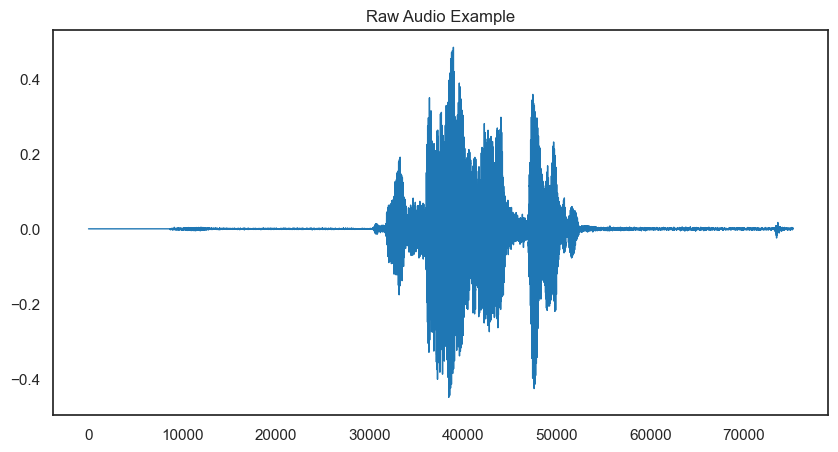

In [5]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

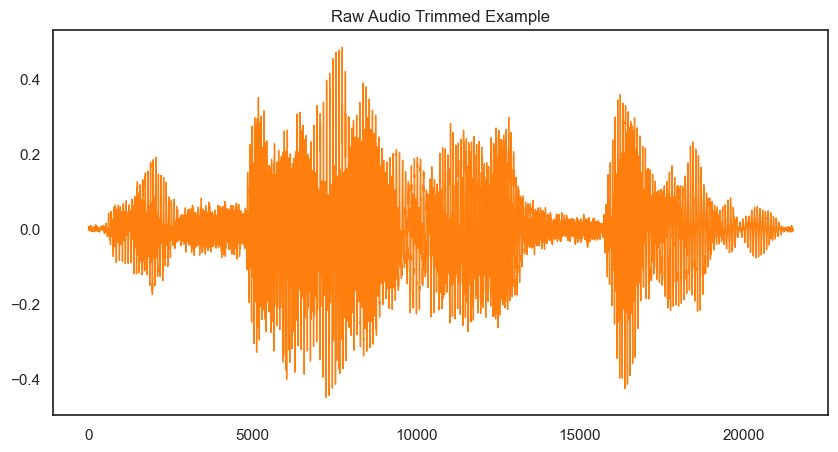

In [6]:
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()

In [7]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 148)

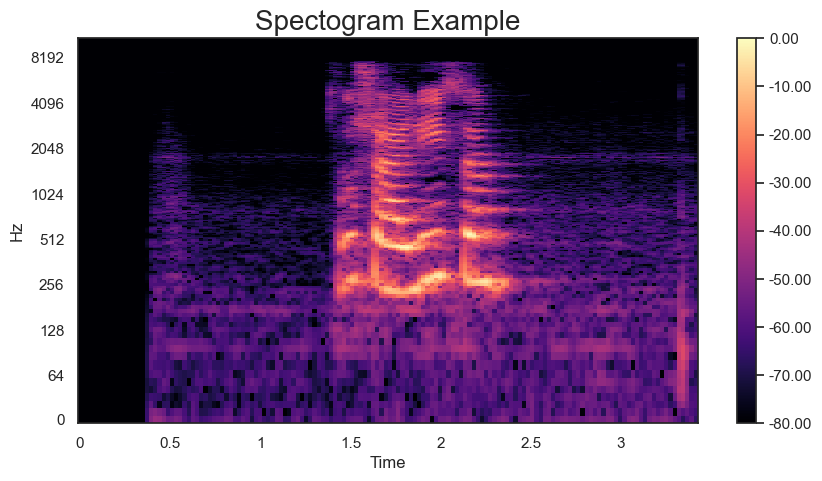

In [8]:
y, sr = librosa.load(audio_files[0])
# y, _ = librosa.effects.trim(y, top_db=20)
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [10]:
import IPython.display as ipd
# Play audio file
# ipd.Audio('male and female voices\\test\\test\\00b1d7d0d6fdb25050041f6e2ae2871e.wav')
ipd.Audio(audio_files[0])